In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [100]:
data=pd.read_csv('/content/bank_churn.csv',index_col='ID')
data.head()

,active_member,balance,country,credit_score,gender,products_number,churn
ID,,,,,,,
0,1,124253.015048,1,637,0,1,1
1,0,121152.050000,1,738,1,2,1
2,0,79589.430000,0,666,0,1,0
3,0,102519.343288,1,645,0,1,1
4,1,0.000000,0,674,1,1,0


In [101]:
data.info()
#no categorical datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   active_member    600 non-null    int64  
 1   balance          600 non-null    float64
 2   country          600 non-null    int64  
 3   credit_score     600 non-null    int64  
 4   gender           600 non-null    int64  
 5   products_number  600 non-null    int64  
 6   churn            600 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 37.5 KB


In [102]:
data.describe()

,active_member,balance,country,credit_score,gender,products_number,churn
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.386667,84874.486341,0.615000,649.231667,0.425000,1.411667,0.500000
std,0.487393,62900.293847,0.721787,88.941248,0.494755,0.576846,0.500417
min,0.000000,0.000000,0.000000,350.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,591.750000,0.000000,1.000000,0.000000
50%,0.000000,107688.905000,0.000000,648.000000,0.000000,1.000000,0.500000
75%,1.000000,134839.800930,1.000000,707.000000,1.000000,2.000000,1.000000
max,1.000000,206868.780000,2.000000,850.000000,1.000000,4.000000,1.000000


In [103]:
data.isna().sum()
#no null values

,0
active_member,0
balance,0
country,0
credit_score,0
gender,0
products_number,0
churn,0


In [104]:
data.nunique()

,0
active_member,2
balance,413
country,3
credit_score,282
gender,2
products_number,4
churn,2


In [105]:
data['churn'].value_counts()

,count
churn,
1,300
0,300


In [106]:
data.corr()['churn'].sort_values(ascending=True)
#here colms like county and credit_score barely have any effect on the target
#hence for linear models these values dont play an important role
#but for non linear models correlation is not a factor as they can analyse on colms with lesser correlation too

,churn
active_member,-0.431224
gender,-0.387720
products_number,-0.205310
country,-0.039287
credit_score,-0.034340
balance,0.150871
churn,1.000000


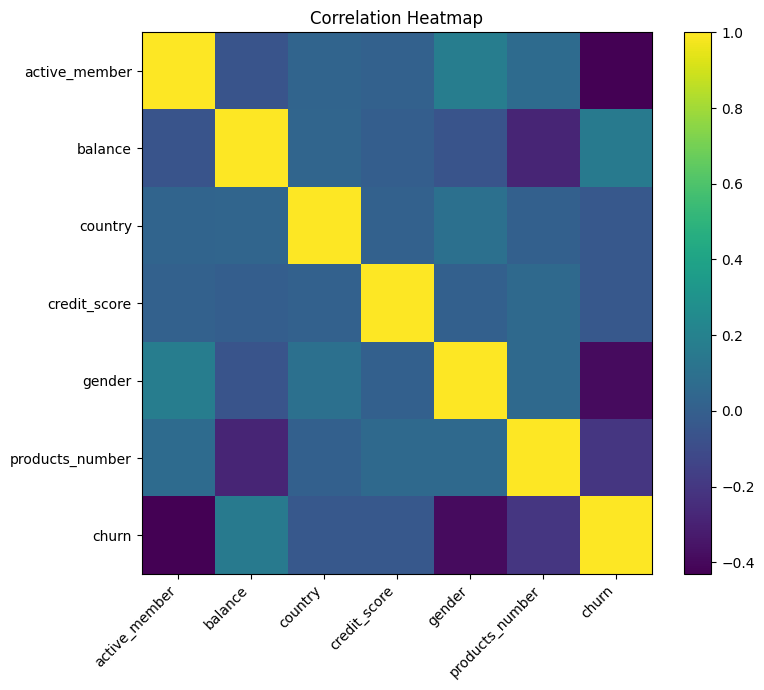

In [107]:
corr=data.corr()
plt.figure(figsize=(8,7))
plt.imshow(corr,aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)),corr.columns,rotation=45,ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("corr.png")
plt.show()


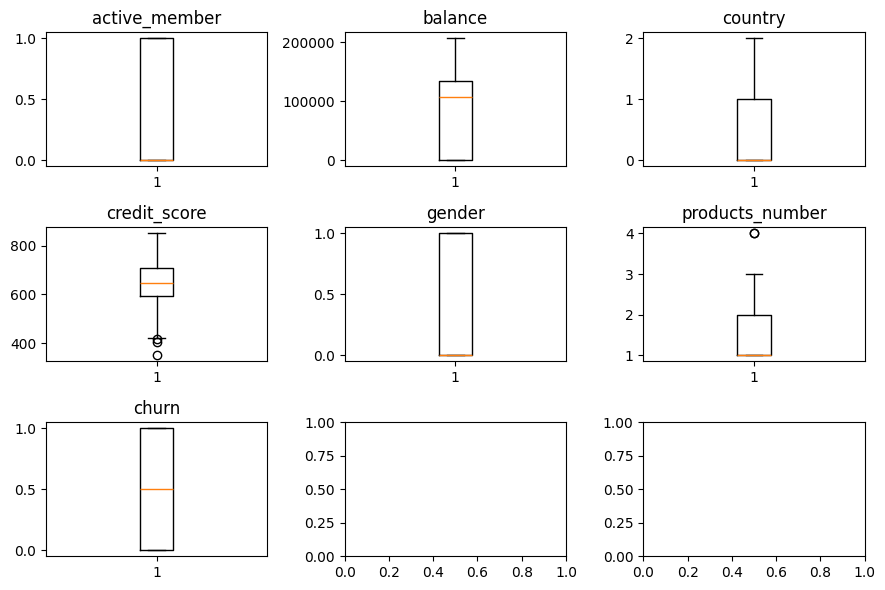

In [108]:
fig,axes=plt.subplots(3,3,figsize=(3*3,2*3))
axes=axes.flatten()
for ax,col in zip(axes,data.columns):
  ax.boxplot(data[col].dropna())
  ax.set_title(col)
plt.tight_layout()
plt.savefig("no_outliers.png")
plt.show()




In [109]:
data.drop(columns=['country','credit_score'],inplace=True)
#as these columns doesnt make much effort in predicting the churn

In [110]:
X=data.drop(columns=['churn'])
y=data['churn']

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,roc_auc_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
y_pred_proba=model.predict_proba(X_test_scaled)

In [113]:
print(f"Precision Score:{precision_score(y_test,y_pred):.2f}")
print(f"Accuracy Score:{accuracy_score(y_test,y_pred):.2f}")
print(f"Recall Score:{recall_score(y_test,y_pred):.2f}")

Precision Score:0.68
Accuracy Score:0.73
Recall Score:0.86


In [114]:
confusion_matrix(y_test,y_pred)
#here TN=38,FP=24,FN=8,TP=50

array([[38, 24],
       [ 8, 50]])

In [115]:
roc_auc_score(y_test,y_pred_proba[:,1]) #here all values of positive churn is selected
#82 is a good score

np.float64(0.8298109010011123)

In [116]:
datas=pd.DataFrame({
    "Actual":y_test,
    "Predicted":y_pred
})
datas.to_csv("predicted_csv.csv",index=False)